In [7]:
pip install pandas-datareader

  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import pandas_datareader as data

In [9]:
import numpy as np
import matplotlib.pyplot as plt


In [10]:
df  = pd.read_csv("C:\\Users\\Abhishek\\Downloads\\AAPL (1).csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.848323,535796800
1,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.776801,512377600
2,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.788168,778321600
3,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.719961,767972800
4,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.754065,460734400


In [11]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5531,2021-12-27,177.089996,180.419998,177.070007,180.330002,178.527756,74919600
5532,2021-12-28,180.160004,181.330002,178.529999,179.289993,177.498138,79144300
5533,2021-12-29,179.330002,180.630005,178.139999,179.380005,177.587250,62348900
5534,2021-12-30,179.470001,180.570007,178.089996,178.199997,176.419067,59773000
5535,2021-12-31,178.089996,179.229996,177.259995,177.570007,175.795364,64062300


In [12]:
df = df.reset_index()
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.848323,535796800
1,1,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.776801,512377600
2,2,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.788168,778321600
3,3,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.719961,767972800
4,4,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.754065,460734400


In [13]:
df = df.drop(['index', 'Date', 'Adj Close'], axis=1)


In [14]:
df.head()

,Open,High,Low,Close,Volume
0,0.936384,1.004464,0.907924,0.999442,535796800
1,0.966518,0.987723,0.903460,0.915179,512377600
2,0.926339,0.987165,0.919643,0.928571,778321600
3,0.947545,0.955357,0.848214,0.848214,767972800
4,0.861607,0.901786,0.852679,0.888393,460734400


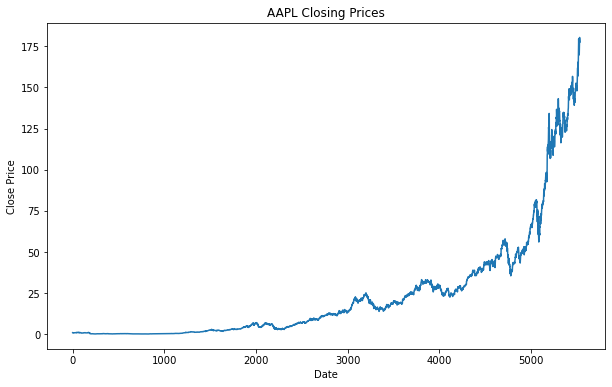

In [15]:

# Create a larger figure
plt.figure(figsize=(10, 6))  # Specify the width and height in inches

# Plot the 'Close' data from your DataFrame
plt.plot(df.Close)

# Add labels and title if needed
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('AAPL Closing Prices')

# Show the plot
plt.show()


Creating moving average

In [16]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5531    153.3444
5532    153.6667
5533    153.9991
5534    154.3202
5535    154.6399
Name: Close, Length: 5536, dtype: float64

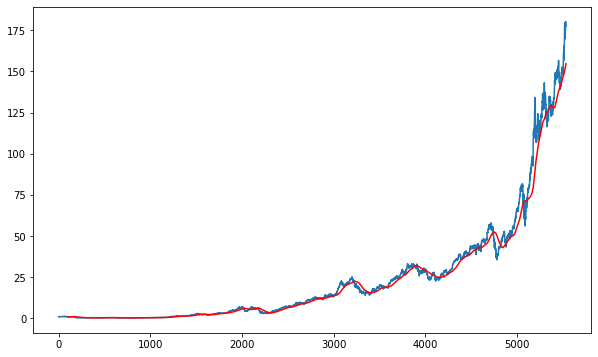

In [17]:
plt.figure(figsize = (10, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [18]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
5531    142.85570
5532    143.13220
5533    143.40125
5534    143.66845
5535    143.95365
Name: Close, Length: 5536, dtype: float64

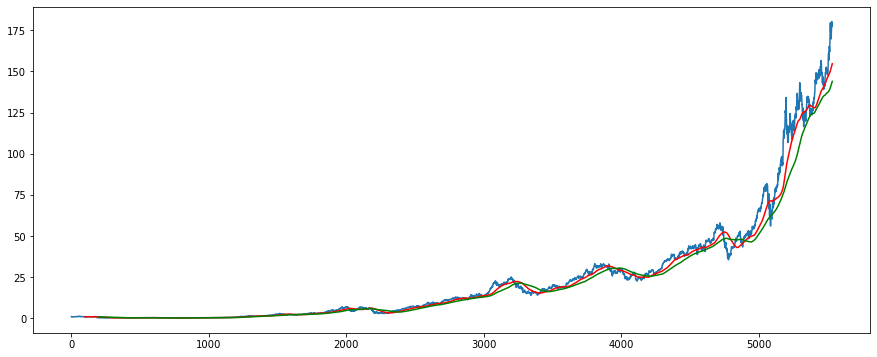

In [19]:
plt.figure(figsize = (15, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')


In [20]:
df.shape

(5536, 5)

Trainig and testing split

In [21]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(3875, 1)
(1661, 1)


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [23]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02317551],
       [0.0206233 ],
       [0.02102893],
       ...,
       [0.99273067],
       [0.99076197],
       [0.97940375]])

In [24]:
X_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    X_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)
    

In [26]:
X_train.shape

(3775, 100, 1)

In [25]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [27]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [29]:
model.compile(optimizer = 'adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
118/118 [==============================] - 75s 576ms/step - loss: 0.0163
Epoch 2/100
118/118 [==============================] - 69s 581ms/step - loss: 0.0040
Epoch 3/100
118/118 [==============================] - 69s 582ms/step - loss: 0.0035
Epoch 4/100
118/118 [==============================] - 70s 588ms/step - loss: 0.0032
Epoch 5/100
118/118 [==============================] - 68s 578ms/step - loss: 0.0034
Epoch 6/100
118/118 [==============================] - 76s 642ms/step - loss: 0.0031
Epoch 7/100
118/118 [==============================] - 80s 676ms/step - loss: 0.0029
Epoch 8/100
118/118 [==============================] - 70s 591ms/step - loss: 0.0031
Epoch 9/100
118/118 [==============================] - 69s 580ms/step - loss: 0.0029
Epoch 10/100
118/118 [==============================] - 68s 579ms/step - loss: 0.0026
Epoch 11/100
118/118 [==============================] - 75s 635ms/step - loss: 0.0031
Epoch 12/100
118/118 [==============================] - 71s 599

In [30]:
model.save('keras_model.h5')

In [34]:
past_100_days = data_training.tail(100)

In [35]:
final_df = past_100_days.append(data_testing, ignore_index = True)

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_17084\3299050086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [36]:
final_df.head()

,Close
0,26.565001
1,26.937500
2,27.972500
3,28.002501
4,27.312500


In [37]:
input_data = scaler.fit_transform(final_df)

In [40]:
input_data

array([[0.02523061],
       [0.02759201],
       [0.03415323],
       ...,
       [0.99397764],
       [0.98649716],
       [0.98250344]])

In [41]:
input_data.shape

(1761, 1)

In [42]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    

In [44]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape) 

(1661, 100, 1)
(1661,)


Predictions

In [45]:
y_predicted = model.predict(x_test)

In [46]:
y_predicted

array([[0.0872793 ],
       [0.08747268],
       [0.0876788 ],
       ...,
       [0.86651844],
       [0.8731063 ],
       [0.87768275]], dtype=float32)

In [47]:
scaler.scale_

array([0.00633935])

In [48]:
Scale_factor = 1/0.00633935
y_predicted = y_predicted * Scale_factor
y_test = y_test * Scale_factor

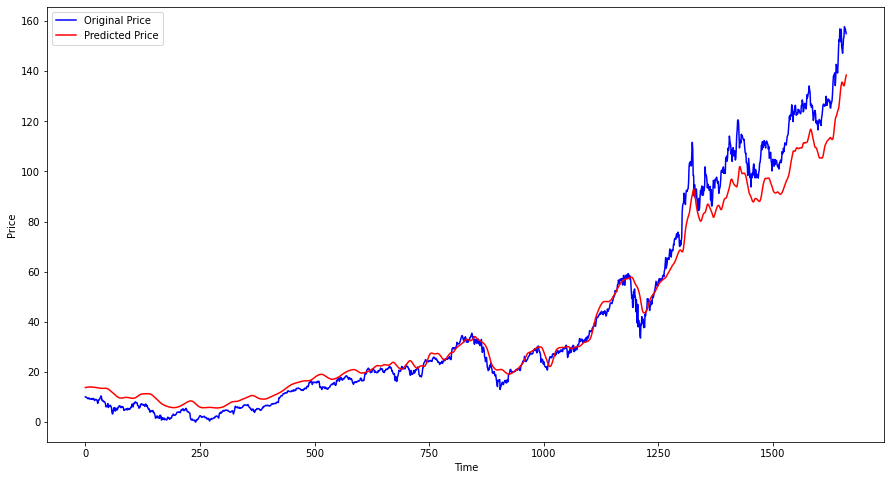

In [51]:
plt.figure(figsize=(15,8))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

plt.show()